## 1. 변수변환

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [2]:
# 데이터 생성
np.random.seed(42)
X = np.random.normal(size=100)
y = 5 + 2 * X + np.random.normal(scale=2 + 0.5 * X**2, size=100)  # 비등분산 데이터 생성

# 데이터 프레임으로 변환
df = pd.DataFrame({'X': X, 'y': y})

/Users/inchoi/Statistics/code3_regression/myenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


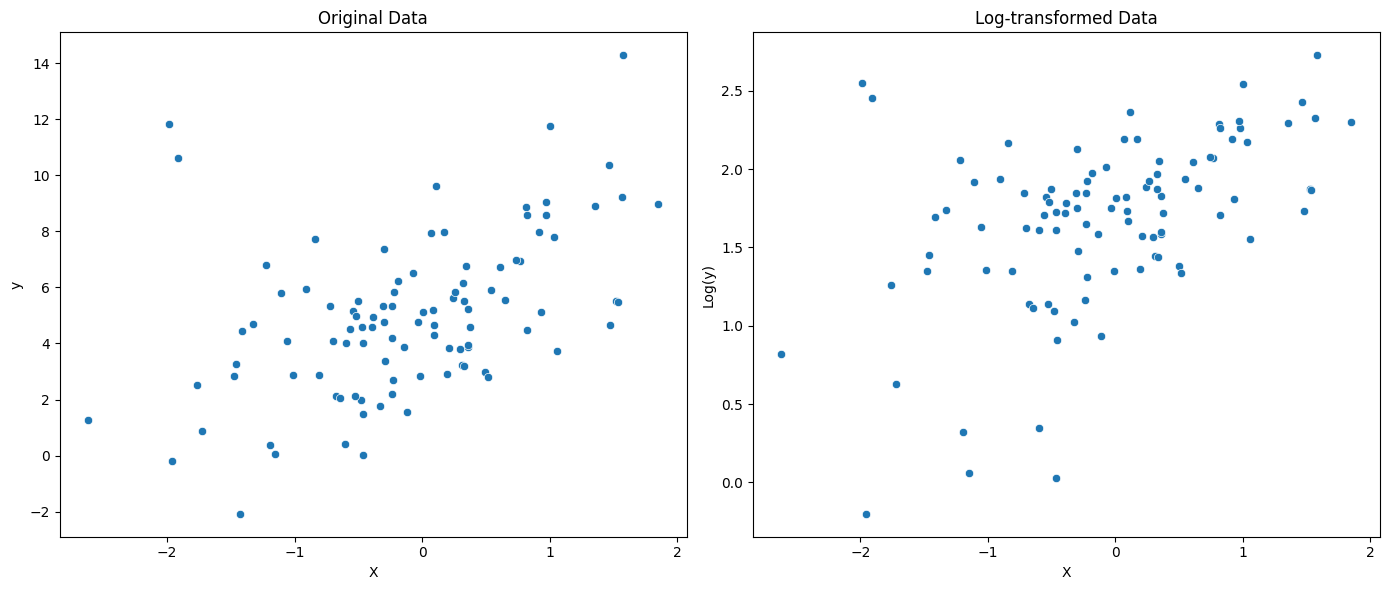

In [3]:
# 원본 데이터와 로그변환 데이터 시각화
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 원본 데이터 시각화
sns.scatterplot(x='X', y='y', data=df, ax=axs[0])
axs[0].set_title('Original Data')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')

# 로그변환
df['y_log'] = np.log1p(df['y'])

# 로그변환 후 데이터 시각화
sns.scatterplot(x='X', y='y_log', data=df, ax=axs[1])
axs[1].set_title('Log-transformed Data')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Log(y)')

plt.tight_layout()
plt.show()

In [4]:
# 회귀 분석 수행
reg = LinearRegression().fit(df[['X']], df['y'])
reg_log = LinearRegression().fit(df[['X']], df['y_log'])

print("Original Data R^2:", reg.score(df[['X']], df['y']))
print("Log-transformed Data R^2:", reg_log.score(df[['X']], df['y_log']))

ValueError: Input y contains NaN.

## 2. WLS

In [5]:
import statsmodels.api as sm

# 비정상적인 분산 데이터 생성
np.random.seed(42)
X = np.random.normal(size=100)
w = np.exp(X)  # 가중치
y = 5 + 2 * X + np.random.normal(scale=w, size=100)

# 데이터 프레임으로 변환
df = pd.DataFrame({'X': X, 'y': y, 'weights': w})

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.26e-19
Time:                        14:50:46   Log-Likelihood:                -191.63
No. Observations:                 100   AIC:                             387.3
Df Residuals:                      98   BIC:                             392.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0163      0.167     30.003      0.0

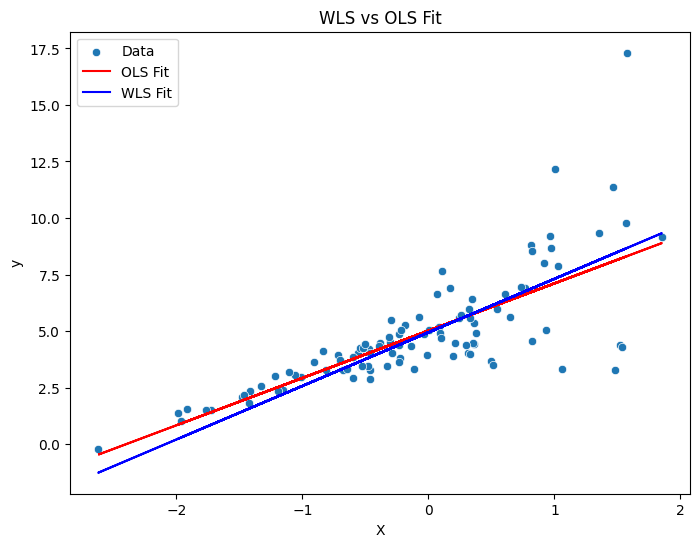

In [6]:

# OLS 모델 적합
X_ols = sm.add_constant(df[['X']])
ols_model = sm.OLS(df['y'], X_ols).fit()
print(ols_model.summary())

# WLS 모델 적합
wls_model = sm.WLS(df['y'], X_ols, weights=df['weights']).fit()
print(wls_model.summary())

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='y', data=df, label='Data')
plt.plot(df['X'], ols_model.predict(X_ols), color='red', label='OLS Fit')
plt.plot(df['X'], wls_model.predict(X_ols), color='blue', label='WLS Fit')
plt.title('WLS vs OLS Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 3. GLS

In [7]:
from statsmodels.regression import gls

# 비정상적인 분산 데이터 생성
np.random.seed(42)
X = np.random.normal(size=100)
y = 5 + 2 * X + np.random.normal(scale=np.exp(X), size=100)  # 비정상적인 분산 데이터 생성

# 데이터 프레임으로 변환
df = pd.DataFrame({'X': X, 'y': y})

ImportError: cannot import name 'gls' from 'statsmodels.regression' (/Users/inchoi/Statistics/code3_regression/myenv/lib/python3.12/site-packages/statsmodels/regression/__init__.py)

In [8]:
# GLS 모델 적합
X_gls = sm.add_constant(df[['X']])
gls_model = sm.GLS(df['y'], X_gls, sigma=np.exp(df['X'])).fit()
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            GLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     487.7
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           7.91e-40
Time:                        14:51:14   Log-Likelihood:                -141.10
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9486      0.117     42.392      0.0

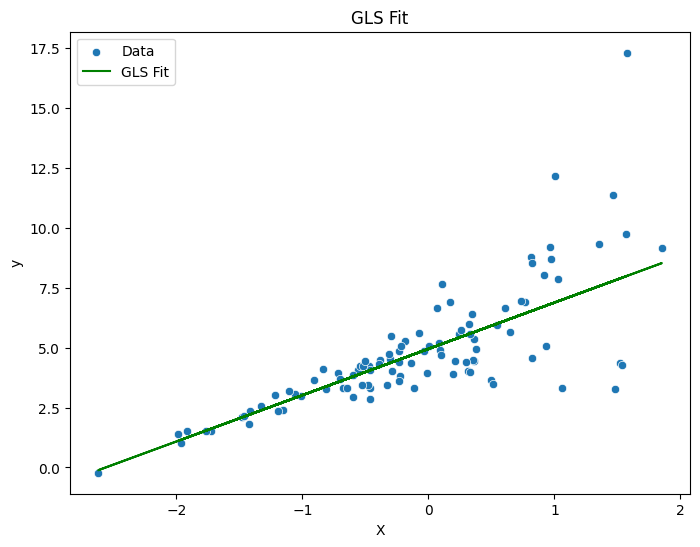

In [9]:
# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='y', data=df, label='Data')
plt.plot(df['X'], gls_model.predict(X_gls), color='green', label='GLS Fit')
plt.title('GLS Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 4. 2단계 추정

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 비정상적인 분산 데이터 생성
np.random.seed(42)
X = np.random.normal(size=100)
Z = np.random.normal(size=100)  # 도구 변수
y = 5 + 2 * X + np.random.normal(scale=np.exp(X), size=100)  # 비정상적인 분산 데이터 생성

# 데이터 프레임으로 변환
df = pd.DataFrame({'X': X, 'y': y, 'Z': Z})

In [11]:
# 1단계: 도구 변수를 사용하여 예측된 가중치 추정
iv_model = smf.ivreg('y ~ X | Z', data=df).fit()
predicted_weights = np.exp(iv_model.fittedvalues)

AttributeError: module 'statsmodels.formula.api' has no attribute 'ivreg'

In [12]:
# 2단계: WLS를 사용하여 회귀계수 추정
X_wls = sm.add_constant(df[['X']])
wls_model = sm.WLS(df['y'], X_wls, weights=predicted_weights).fit()
print(wls_model.summary())

NameError: name 'predicted_weights' is not defined

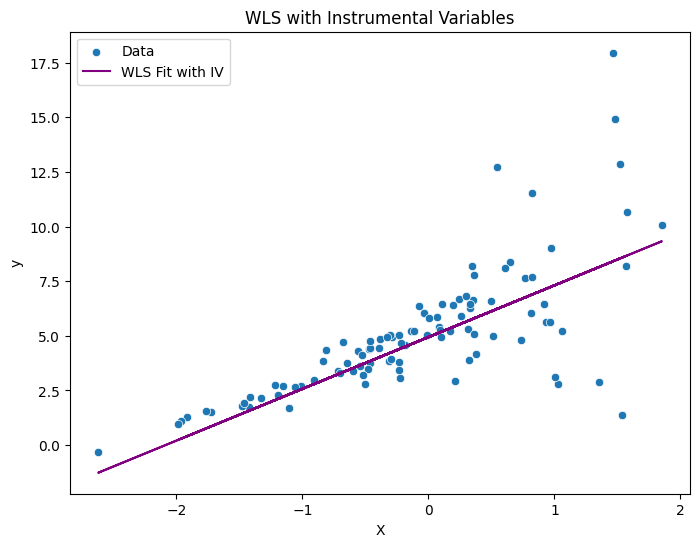

In [14]:
# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='y', data=df, label='Data')
plt.plot(df['X'], wls_model.predict(X_wls), color='purple', label='WLS Fit with IV')
plt.title('WLS with Instrumental Variables')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()